In [2]:
class xyx:
    def __init__(self):
                pass
    def print_class_name(self):
        print(self.__class__)

obv=xyx()
obv.print_class_name()

<class '__main__.xyx'>


## Colab Installations if Needed

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Master Thesis/DeepRL
!ls -l
!apt-get update -y && apt-get install -y xvfb && apt-get install -y python-opengl && apt-get install -y cmake && apt-get install -y zlib1g zlib1g-dev
!pip install gym pyvirtualdisplay pyglet box2d-py atari_py pystan ipywidgets==7.6.5 jupyter_contrib_nbextensions


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Master Thesis/DeepRL
total 1087
drwx------ 3 root root   4096 Nov 12 15:35 agents
-rw------- 1 root root 305981 Nov 12 15:57 DQN_Cartpole.ipynb
-rw------- 1 root root 600354 Nov 12 15:35 DQN_Lunar_Lander.ipynb
drwx------ 3 root root   4096 Nov 12 15:35 DQN_trained_models
drwx------ 3 root root   4096 Nov 12 15:35 helpers
-rw------- 1 root root  14178 Nov 12 15:35 PG_Cartpole.ipynb
-rw------- 1 root root 168364 Nov 12 15:35 PG_Lunar_Lander.ipynb
drwx------ 2 root root   4096 Nov 12 15:35 Presentations
-rw------- 1 root root   5852 Nov 12 15:35 README.md
-rw------- 1 root root     88 Nov 12 15:35 requirements.txt
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.downl

## Imports

In [ ]:
from agents.DQN_Agent import DQN_Agent
from helpers.plot_util import *

Create DQN_Agent

In [ ]:
agent= DQN_Agent(
                 env_name="CartPole-v1",
                 gamma=0.98,             ## 0.98 was good for Cartpole###############################
                 epsilon=1.0,
                 layer1_size=32, 
                 layer2_size=32,             
                 lr=0.001,               
                 mem_size=100000000,
                 batch_size=64,          #1024,    ########## with 1024 was good for Cartpole #######
                 epsilon_dec=0.0001,     #0.0003, ###### 0.0005 was OKAY not so good for Cartpole ###
                 epsilon_end=0.01,       #######_____________#####_____________________##############
                 reproduce_seed=None#42
                )

# If you want to first train an agent use this cell ❎

Eps: 2 ,  Eps steps: 18 ,Epsilon: 1.00, Ep_Reward : 18.00 , Average_Reward : 22.50

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Eps: 500 ,  Eps steps: 207 ,Epsilon: 0.01, Ep_Reward : 207.00 , Average_Reward : 157.29
 Agent trained.....

 Saving Model info.....

 CartPole-v1 Problem took 500 episodes


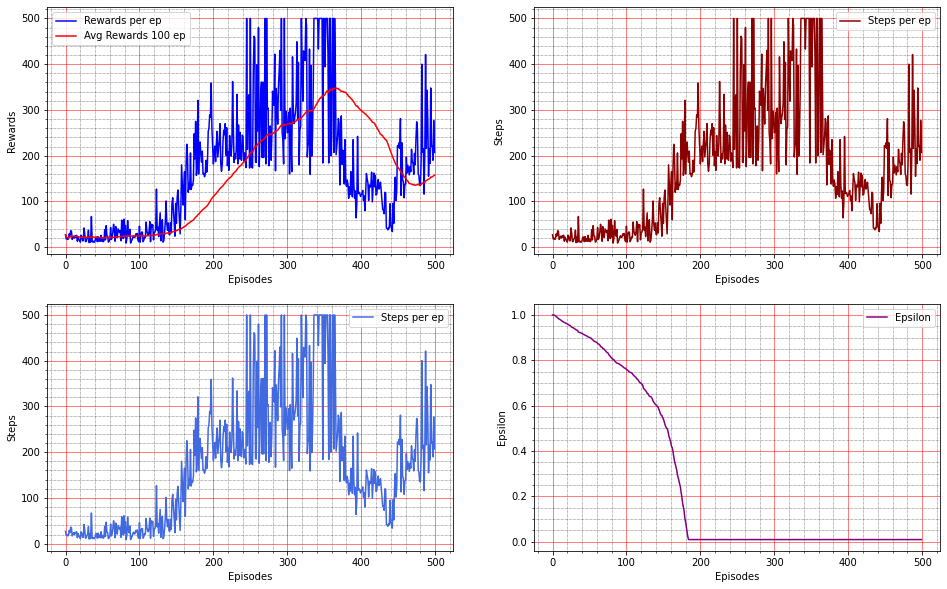

In [ ]:
agent.train_multiple_episodes(num_episodes=500)    ## 500 was good hann tha toh acha kya kahte ho aap
model,book_keeping=agent.get_trained_model_info()
# plot Learning curve
learning_plot(book_keeping)

## Run this cell to check performance on 16 Test Cases

pyvirtualdisplay successfully imported
Tests # 42 , Rewards 500.0 , Steps 500
Tests # 900 , Rewards 500.0 , Steps 500
Tests # 930 , Rewards 217.0 , Steps 217
Tests # 180 , Rewards 338.0 , Steps 338
Tests # 660 , Rewards 258.0 , Steps 258
Tests # 240 , Rewards 500.0 , Steps 500
Tests # 960 , Rewards 271.0 , Steps 271
Tests # 450 , Rewards 305.0 , Steps 305
Tests # 30 , Rewards 343.0 , Steps 343
Tests # 90 , Rewards 289.0 , Steps 289
Tests # 150 , Rewards 257.0 , Steps 257
Tests # 210 , Rewards 500.0 , Steps 500
Tests # 330 , Rewards 212.0 , Steps 212
Tests # 420 , Rewards 257.0 , Steps 257
Tests # 510 , Rewards 279.0 , Steps 279
Tests # 75 , Rewards 253.0 , Steps 253


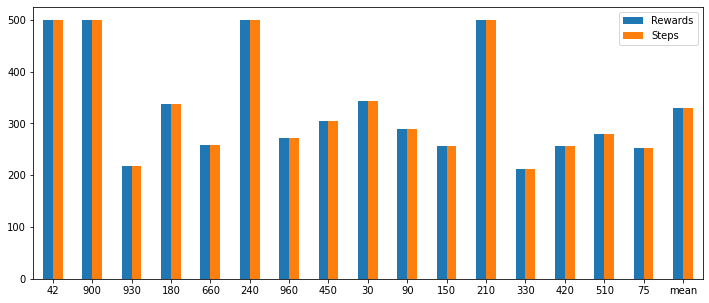

In [ ]:
if agent.trained:
  test_cases_data,image_paths =agent.run_test_instances(case_list=[42,900,930,180,660,240,960,450,30,90,150,210,330,420,510,75], model_=model)
  # Plot Test cases data
  plot_test_cases(test_cases_data)

### Save the trained model manually

In [ ]:
agent.save_model()

# If you want to use a pretrained model use this cell ❎

In [ ]:
if not agent.trained:
  # Good Models 20211108-194235 ,  20211108-082804 , 20211109-182644 , 20211111-113810
  # not so good models 20211111-111248
  model_suffix="20211108-082804" # some 
  model,book_keeping , image_paths = agent.load_pre_trained_model_info(timestr=model_suffix)
  # plot Learning curve
  learning_plot(book_keeping)


### Render the 16 Test Case gif's : ⏩

In [ ]:
import IPython.display as display
import ipywidgets as widgets
from ipywidgets import GridspecLayout

rows=8
cols=4
grid = GridspecLayout(rows,cols)
index_of_img=0
for i in range(0,rows,2):
    for j in range(cols):
        
        path_of_img=image_paths[index_of_img]
        img=open(path_of_img,'rb').read()
        
        grid[i, j] = widgets.Image(value=img, format='gif', width=220, height=510)
        grid[i+1, j] = widgets.HTML(value=path_of_img[path_of_img.index('IMAGES/')+7 :])
        index_of_img+=1
        
        

grid

GridspecLayout(children=(Image(value=b'GIF89aX\x02\x90\x01\x82\x00\x00\x00\x00\x00\xcc\x99fff\xcc\x99\x99\xcc\…

# Conclusions for DQN Agents

*   Agent doesnot generalize quite well to other instances of enviroment when we use reproducable seeds for libraries
*   Agent's learning is dependent on initial weights of the Model. 
*   We had to train the agent on different set of Model architectures and other set of hyperparameters in order to determine a workable one which could generalize well to other instances of the environment.   
*   Depedinig upon the enviroment specification Agent's learning performance may drop significatly after some episodes of training because of a phenomenon in neural networks called catastrophic forgetting

# Recommendations required ⚓

*   How to rearrange the DQN agents notebooks for results and analysis purposes ?
*   How should the minute details about the code in Thesis ? 
*   Use of Docker image since some libraries like gif rendering require libraries which are specific to OS kernel.